# Capstone: 

## Problem Statement
---
To build a TFID and Logistic Regression model that accurately classifies an article of news as real or fake.


With the increasing users on multiple social media platforms and political parties looking to gain advantages, fake news is more common than ever. This should be no surprise with the huge volume of data being generated from people all around the world. Dictionary.com listed 'misinformation' as the word of the year in 2018. Fake news is classified as news that has a false connection, false context, and or misleading, impostering or fabricated content. In other words, fake news is any news that is factually wrong, misrepresents the facts, and spreads to targeted audiences. These instances of fake news is purposefully done with the intentions of pushing certains ideas to readers for a political or social influence, media manipulation, and social and financial profit. With the emergence of social media, not only does it spread through television and radio but also outlets such as Facebook, Twitter, Reddit, etc. The lack of trust in the media is a growing problem that effects the democracy we live in as well as the way our society receives information. 

## Executive Summary
---
In this project, I collected a fake news dataset from a Kaggle Prediction Competition to build a CVEC & Multinomial Naive Bayes model that can accurately classify a news article as real or fake based on the text. My goal is to build a model that more accurately classifies news as real or fake better than the null model, plurality class.

My approach after collecting the dataset, was to clean and remove the null values as well as the columns besides the text and target. I was able to clean the article entries by using a variety of functions and transformers to remove special characters, tokenize, lemmatize, and remove less meaningful words.

Once the text data was pre-processed and I was able to visualize the data in my exploratory data analysis. To better understand the data, I created columns such as polarity and word count. I wanted to explore if there was a correlation between the sentiment of a real or fake article. I began testing multiple models and numerous hyperparameters to produce an accuracy score that outperforms the null model. 

## Table of Contents
---
- [Imports](#Imports)
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaning and Exploratory Data Analysis](#Data-Cleaning-and-Exploratory-Data-Analysis)
    - [Removing Unwanted Characters](#Removing-Unwanted-Characters)
    - [Visualizations](#Visualizations)
- [Model Prep](#Model-Prep)
- [Modeling](#Modeling)
    - [CVEC and Multinomial Naive Bayes](#CVEC-and-Multinomial-Naive-Bayes)
    - [TFID and Logistic Regression](#TFID-and-Logistic-Regression)
- [Model Selection](#Model-Selection)
- [Model Evaluation - TFID and Logistic Regression](#Model-Evaluation---TFID-and-Logistic-Regression)
    - [Confusion Matrix](#Confusion-Matrix)
    - [Receiver Operating Characteristic (ROC) Curve](#Receiver-Operating-Characteristic-(ROC)-Curve)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
    - [Misclassification](#Misclassification)
- [References](#References)

## Imports
---

In [118]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from textblob import TextBlob as tb
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score

## Data Dictionary
Column | Description
- | - 
id | number of entry 
title | name of article 
author | writer of article 
text | the main body of the article or piece of writing
label | classification of article, 0 represents real and 1 represents fake
polarity | sentiment score of each article in the range of [-1,1], 1 means positive sentiment and -1 means a negative sentiment
length | total number of characters in a article
word count | total number of words in a article
label class | classification of article by True and False

In [155]:
df.head()

,id,title,author,text,label,author_count,polarity,text_length,word_count,label_class
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide we didnt even see comeys letter...,1,10.0,0.001796,4809,815,False
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0,17.0,0.100880,4041,702,True
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october 29 2...,1,58.0,0.056258,7461,1246,False
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1,1.0,0.017497,3174,554,False
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to ...,1,44.0,-0.012500,912,150,False


## Data Cleaning and Exploratory Data Analysis

In [2]:
# load in fake news dataset
df = pd.read_csv('../data/train.csv')

In [3]:
# view shape of dataset
df.shape

(20800, 5)

In [4]:
# view first five entries of dataset
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# view datatypes of each column
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [6]:
# view the total missing values for each column
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# fill missing values in text with "ignore text"
df.text.fillna("IGNORE TEXT", inplace=True)

In [8]:
# view the total missing values for each column after handling missing values
df.isnull().sum()

id           0
title      558
author    1957
text         0
label        0
dtype: int64

In [9]:
# filter rows where article is classified as real
df.loc[df['label'] == 0].sort_values('author', ascending=True).head()

,id,title,author,text,label
3352,3352,Review: ‘Café Society’ Isn’t Woody Allen’s Wor...,A. O. Scott,"“Café Society,” Woody Allen’s new movie, comes...",0
5295,5295,Cinema Is Dead? Telluride Says Not Yet - The N...,A. O. Scott,"TELLURIDE, Colo. — Can we please kill the t...",0
18619,18619,Review: ‘Billy Lynn’s Long Halftime Walk’: Ang...,A. O. Scott,"In 2004, George W. Bush was in the White House...",0
64,64,"Review: ‘Lion’ Brings Tears for a Lost Boy, Wi...",A. O. Scott,"The first part of “Lion,” Garth Davis’s unabas...",0
584,584,"Review: ‘The Secret Life of Pets’ Amuses, but ...",A. O. Scott,First things first: “The Secret Life of Pets” ...,0


There are 10387 articles that are classified as real

In [10]:
# filter rows where article is classified as fake
df.loc[df['label'] == 1].sort_values('author', ascending=True).head()

,id,title,author,text,label
17175,17175,"In hats and t-shirts, Trump fans rally in Jeru...",# 1 NWO Hatr,Reuters \nOn a rooftop overlooking the walls o...,1
13508,13508,Police: Oklahoma Double Murder Suspect Has Hit...,# 1 NWO Hatr,Yahoo News \nA 38-year-old Oklahoma man who ha...,1
12322,12322,Like a ‘Concentration Camp’ Police Mark DAPL P...,# 1 NWO Hatr,Free Thought Project – by Claire Bernish \nCan...,1
16702,16702,The Dark Agenda Behind Globalism And Open Borders,# 1 NWO Hatr,Alt-Market – by Brandon Smith \nWhen people un...,1
10954,10954,Fukushima – The Untouchable Eco-Apocalypse No ...,# 1 NWO Hatr,Waking Times – by Alex Pietrowski \nThe most i...,1


There are 10413 articles classified as fake

In [11]:
# create a column that has the number of occurences per author
df['author_count'] = df.groupby(by='author')['author'].transform('count')

In [12]:
# get the number of occurences for each author
df['author'].value_counts().head(10)

Pam Key                243
admin                  193
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Warner Todd Huston     122
Ian Hanchett           119
Breitbart News         118
Daniel Nussbaum        112
Name: author, dtype: int64

In [13]:
# view first five entries after addition of new column
df.head()

,id,title,author,text,label,author_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,10.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,17.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,58.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,44.0


In [14]:
# view articles classified as fake written by Pam Key
df.loc[(df.author == 'Pam Key') & (df.label == 1), :]

,id,title,author,text,label,author_count
17908,17908,Giuliani Defends Breitbart News Against MSNBC ...,Pam Key,"\nWednesday on MSNBC, former New York City May...",1,243.0


Imposter Content - when genuine sources are impersonated. Out of 243 articles, Pam Key has one article deemed fake which leads me to believe this is an example of imposter content

In [15]:
# view articles classified as fake written by Pam Key
df.loc[(df.author == 'admin') & (df.label == 1), :].head()

,id,title,author,text,label,author_count
114,114,Clinton Campaign Chair Had Dinner With Top DOJ...,admin,"Zero Hedge October 26, 2016 \nIn the latest re...",1,193.0
277,277,Muslims DEMAND Locals Don’t Walk Dogs In Publi...,admin,They are a group that calls themselves “Public...,1,193.0
372,372,IRANIAN MISSILE ACCIDENTALLY DESTROYS IRANIAN ...,admin,jewsnews © 2015 | JEWSNEWS | It's not news...u...,1,193.0
416,416,A nation ‘WRECKED’ by immigration: A civil war...,admin,By REBECCA PERRING \nFor years Sweden has rega...,1,193.0
470,470,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,,1,193.0


The author admin wrote 193 articles and they were all labeled fake. This is an example of fabricated content. This auhtor designed articles to decieve and cause harm.

In [171]:
df.loc[df['label'] == 1].sort_values('author', ascending=True).head()

,id,title,author,text,label,author_count,polarity,text_length,word_count,label_class
17175,17175,"In hats and t-shirts, Trump fans rally in Jeru...",# 1 NWO Hatr,reuters on a rooftop overlooking the walls of...,1,17.0,0.231174,3327,542,False
13508,13508,Police: Oklahoma Double Murder Suspect Has Hit...,# 1 NWO Hatr,yahoo news a 38yearold oklahoma man who has e...,1,17.0,0.030556,2488,430,False
12322,12322,Like a ‘Concentration Camp’ Police Mark DAPL P...,# 1 NWO Hatr,free thought project by claire bernish canno...,1,17.0,0.008601,6512,1006,False
16702,16702,The Dark Agenda Behind Globalism And Open Borders,# 1 NWO Hatr,altmarket by brandon smith when people unfam...,1,17.0,0.084117,13098,2182,False
10954,10954,Fukushima – The Untouchable Eco-Apocalypse No ...,# 1 NWO Hatr,waking times by alex pietrowski the most imp...,1,17.0,0.076987,4648,762,False


In [159]:
# function to read any text
def print_plot(index):
    example = df[df.index == index][['text','label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
        
print_plot(14096)

posted on october 27 2016 by  1 nwo hatr published on mar 22 2015 by whyknot make people happy with this fun halloween prop instructions for how to make a hangmans noose knot in this easy step by step video tutorial the hangmans noose is a sliding noose knot making an adjustable loop at the end of the rope it is also known as the collar knot or the hangmans knot it is claimed to be traditionally tied with nine or thirteen coils or wraps but the amount of coils can vary depending on the type and thickness or size of rope it is knot 119 in the ashley book of knots abok he claims that eight coils is the correct amount  it is actually the same as the uni duncan or grinner knot which is used in fishing to tie hooks swivels lures and flies the difference is in the way the knot is tied  it is one of the strongest noose knots accounting for an enormous body count it is most associated with lynching hanging people from a tree gallows and hanging executions by tying the noose around your neck an

### Removing Unwanted Characters


In [17]:
# remove punctuation 
df['text'] = df['text'].str.replace('[^\\w\\s]','')

# remove punctuation signs
df['text'] = df['text'].str.replace('[!@#$%^&*()_+<>?:.,;]', '') 

# change all text to lowercase
df['text'] = df['text'].str.lower()

# remove new line character
df['text'] = df['text'].str.replace('\n',' ')

# remove quotes 
df['text'] = df['text'].str.replace('"', '')

# remove possessive pronouns
df['text'] = df['text'].str.replace("'s", "")

The cleaner the input, the better the results will be.

In [18]:
print_plot(372)

jewsnews  2015  jewsnews  its not newsunless its jews news  proudly powered by wordpress  theme justwrite by acosmin join the over 14 million fans of jews news on fbits not news unless its jews news
label: 1


In [19]:
# get sentiment score for text between -1 and 1
df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [20]:
# get text length of text 
df['text_length'] = df['text'].astype(str).apply(len)

In [21]:
# get word count of text
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [22]:
# view first five entries with addition of new columns
df.head()

,id,title,author,text,label,author_count,polarity,text_length,word_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide we didnt even see comeys letter...,1,10.0,0.001796,4809,815
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0,17.0,0.100880,4041,702
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october 29 2...,1,58.0,0.056258,7461,1246
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1,1.0,0.017497,3174,554
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to ...,1,44.0,-0.012500,912,150


In [23]:
# view first five entries with the highest word count
df.sort_values(by=['word_count'], ascending=False).head()

,id,title,author,text,label,author_count,polarity,text_length,word_count
13533,13533,Re: The Hard Working American vs. The Governme...,Janet Witt,the hard working american vs the government pa...,1,1.0,0.073915,130309,24135
7530,7530,Re: Why Are So Many People Choosing To Leave T...,BOOTOUTTHEBULLIES,why are so many people choosing to leave the u...,1,1.0,0.082793,112181,20821
19764,19764,Заседание Международного дискуссионного клуба ...,Владимир В. Путин,заседание международного дискуссионного клуба ...,1,1.0,0.000000,138053,20723
8719,8719,Re: How Many People Will Have To Migrate Out O...,Get it right,how many people will have to migrate out of ca...,1,1.0,0.061759,111857,19992
5092,5092,Re: 55 Reasons Why California Is The Worst Sta...,ken williams,55 reasons why california is the worst state i...,1,1.0,0.063386,95743,17371


In [61]:
df['label_class'] = ['False' if i == 1 else 'True' for i in df['label']]

In [62]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [64]:
df['label_class'].value_counts()

False    10413
True     10387
Name: label_class, dtype: int64

### Visualizations

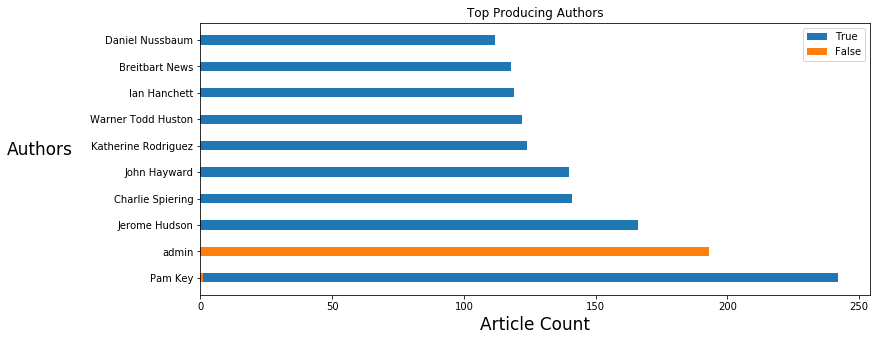

In [176]:
# plot the top producing authors 
authors = ['Pam Key', 'admin', 'Jerome Hudson', 'Charlie Spiering', 'John Hayward', 'Katherine Rodriguez', 'Warner Todd Huston',
           'Ian Hanchett', 'Breitbart News', 'Daniel Nussbaum']
true_counts = [242, 0, 166, 141, 140, 124, 122, 119, 118, 112]
false_counts = [1, 193, 0, 0, 0, 0, 0, 0, 0, 0]
width = 0.35  
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(authors, true_counts, width, label='True')
ax.barh(authors, false_counts, width, label='False')
ax.set_ylabel('Authors', fontsize=17, rotation=0, labelpad=50)
ax.set_xlabel('Article Count', fontsize=17)
ax.set_title('Top Producing Authors')
ax.legend();



This graph represents the top producing authors. The top authors have integrity and produce articles with real facts and no intention to mislead consumers. Pam Key has one incident of a fake article which I think is attributed to imposter content.

In [25]:
# assign color dictionary
color_dict = {
    0:'#fdc500',
    1:'#003f88'
}

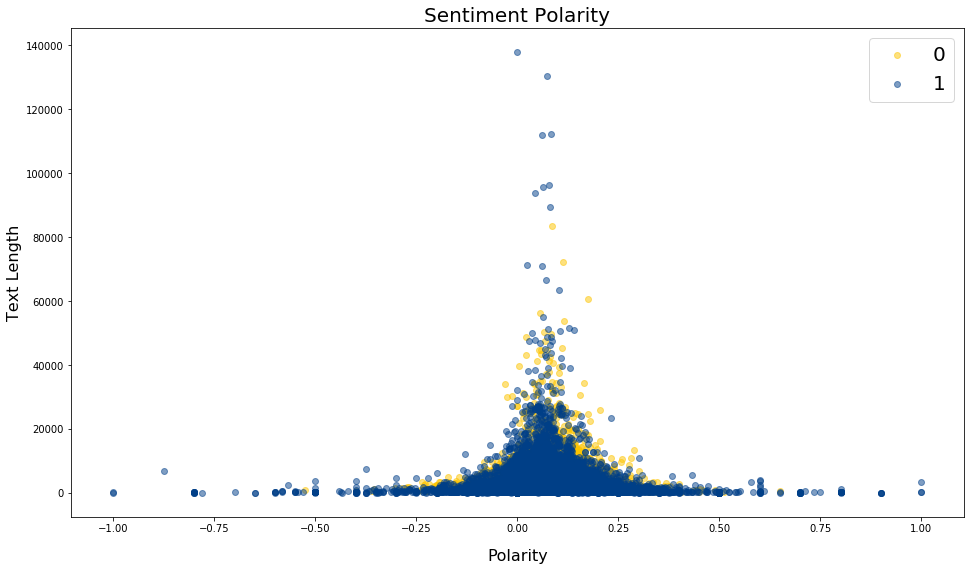

In [26]:
# plot all entries based on sentiment polarity and text length
# assign color dictionary
plt.figure(figsize=(16,9))
categories = [0, 1]
for label in categories:
    mask = df['label'] == label
    plt.scatter(df[mask]['polarity'],
                df[mask]['text_length'],
                c = color_dict[label],
                alpha = .5)
plt.title('Sentiment Polarity', fontsize=20)
plt.xlabel('Polarity', fontsize=16, labelpad= 15)
plt.ylabel('Text Length', fontsize=16)

plt.legend(categories, fontsize='20'); # legend

There is no obvious relation between sentiment and length of the article. This graph does help us see that there are outliers and that they are all classified as fake articles.

In [27]:
# make a scatter plot of all entries based on sentiment polarity and text length

#fig = px.scatter(df, x='polarity', y='text_length', color='label',
                # template="ggplot2", labels={'polarity': 'Polarity',
                #'text_length': 'Text Length', 'label': 'False=1 True=0'},
                 #title='Sentiment Polarity')
#fig.show()

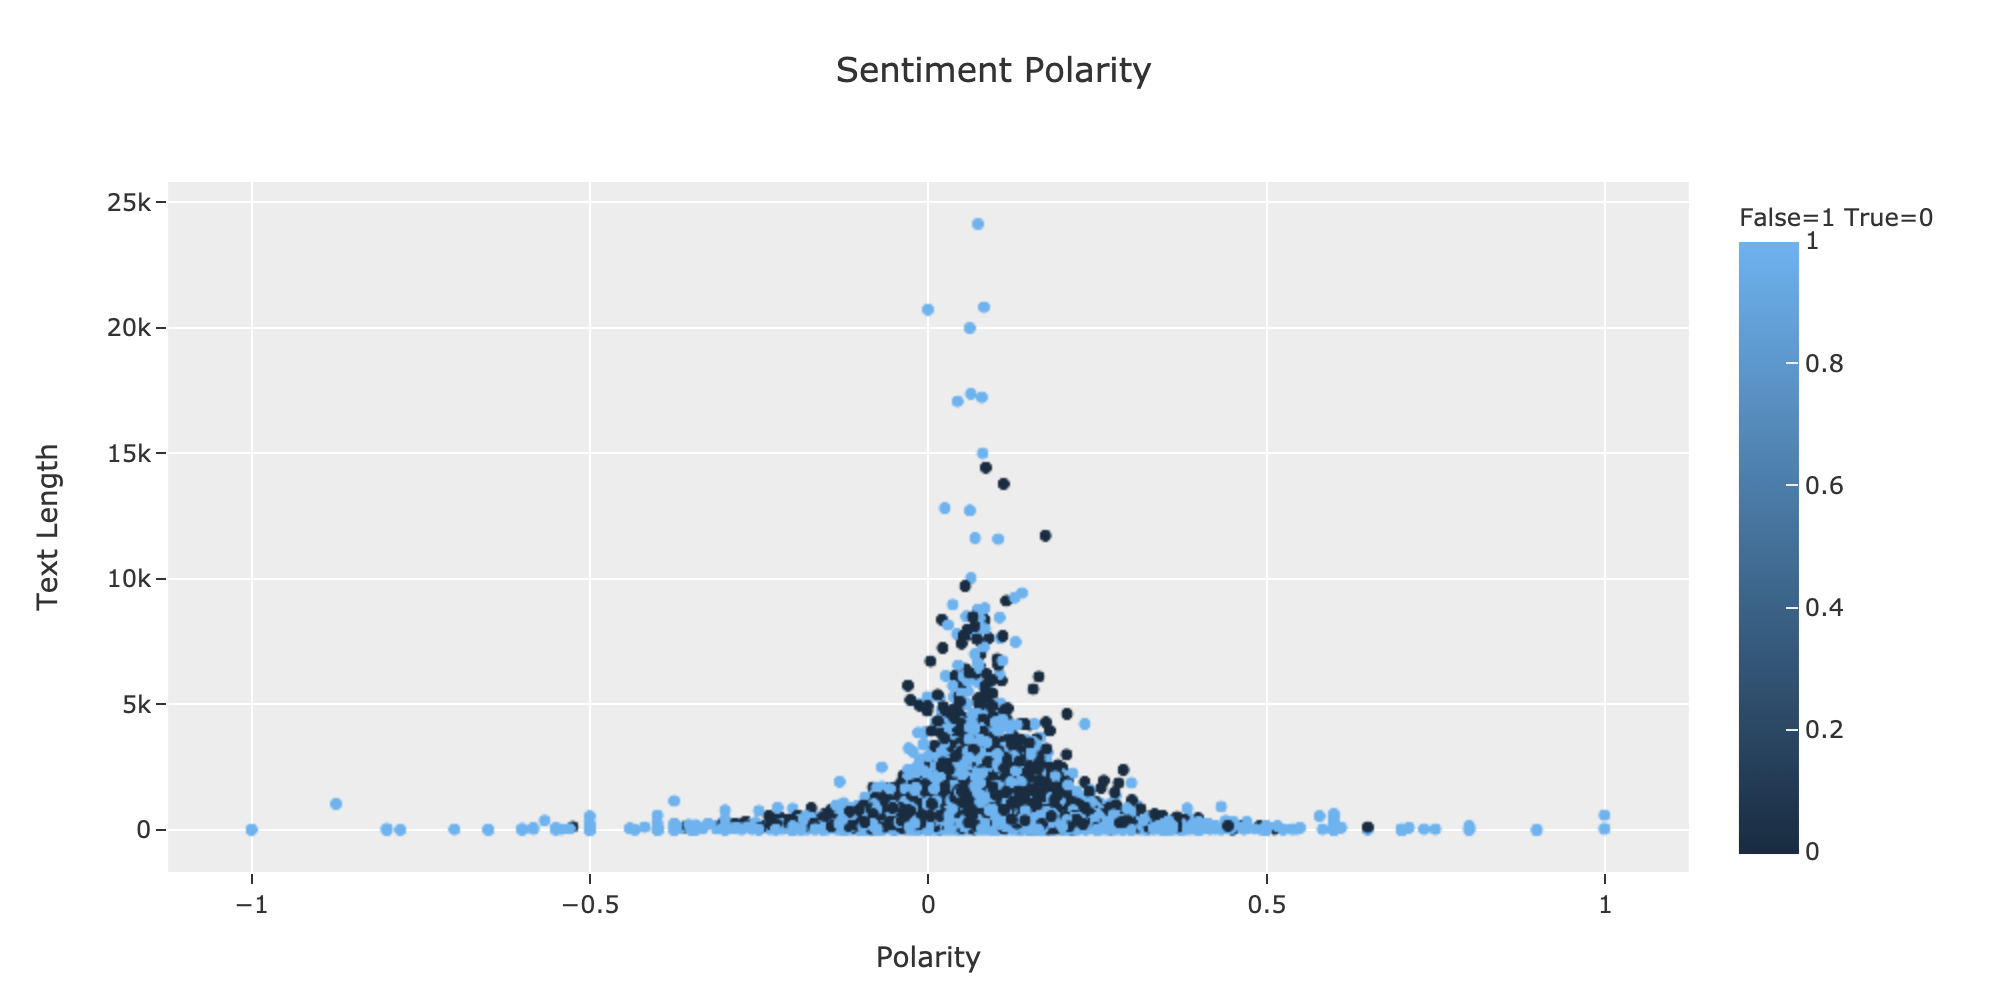

I created a sentiment column in hopes it may provide a correlation between real and fake articles. The 1 means positive sentiment and -1 means a negative sentiment. There seems to be no relationship between sentiment and the length of an article.

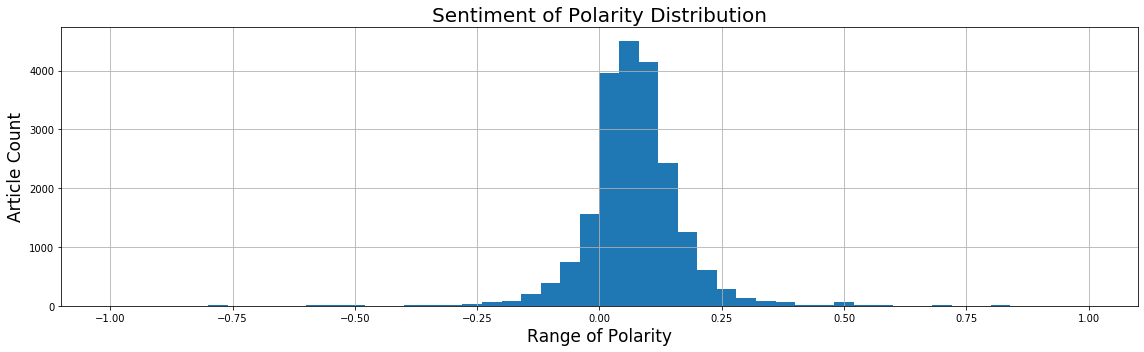

In [167]:
# plot histogram of sentiment polarity distribution
plt.figure(figsize=(16,5))
df['polarity'].hist(bins = 50)
plt.title('Sentiment of Polarity Distribution', fontsize=20)
plt.xlabel('Range of Polarity', fontsize=17)
plt.ylabel('Article Count', fontsize=17)
plt.tight_layout();

This graph represents the range of polarity. This shows us that there is little correlation to sentiment and the labels of articles. To further investigate I will distinguish between real and fake articles.

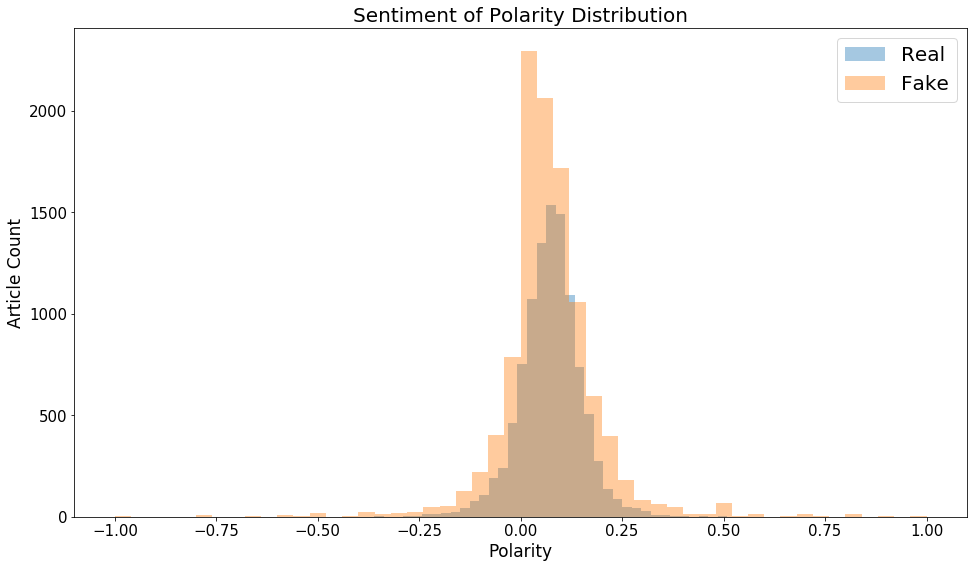

In [29]:
# plot histogram of sentiment polarity distribution 
# apply color layer label
plt.figure(figsize=(16,9))
sns.distplot(df[df['label'] == 0]['polarity'], kde=False, label='Real')
sns.distplot(df[df['label'] == 1]['polarity'], kde=False, label='Fake')
plt.xlabel('Polarity', fontsize='17')
plt.xticks(fontsize='15')
plt.ylabel('Article Count', fontsize='17')
plt.yticks(fontsize='15')
plt.title('Sentiment of Polarity Distribution', fontsize='20')
plt.legend(fontsize='20');

This graph shows there is a normal distribution with the range of polarity in the articles. Most articles fall a little past zero on the polarity scale.

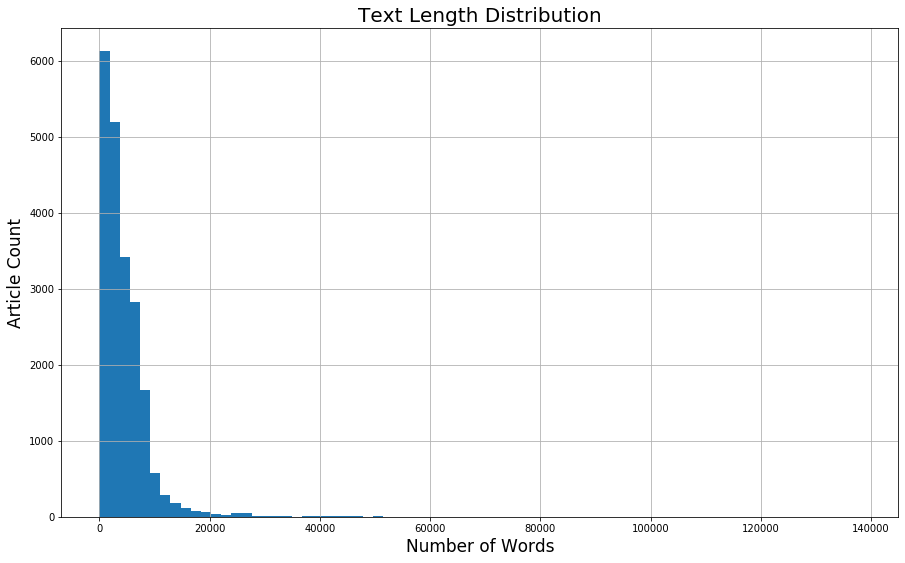

In [30]:
# plot histogram of text length distribution 
plt.figure(figsize=(15,9))
df['text_length'].hist(bins = 75)
plt.title('Text Length Distribution', fontsize=20)
plt.xlabel('Number of Words', fontsize=17)
plt.ylabel('Article Count', fontsize=17);

A single color of this graph makes it difficult to distinguish the correlation between the real and fake articles. I will assign labels to further investigate the relationship.

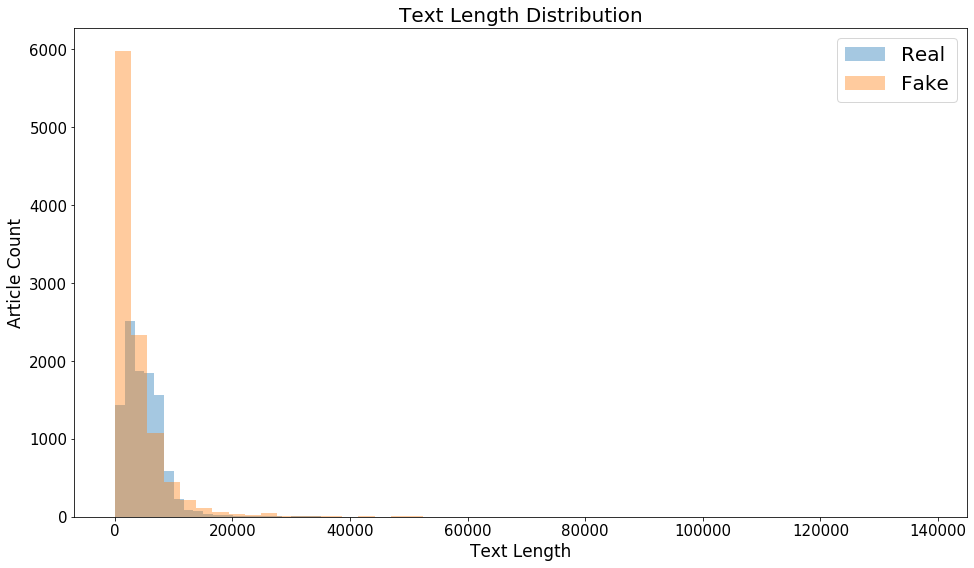

In [161]:
# plot histogram of text length distribution 
# apply color layer label
plt.figure(figsize=(16,9))
sns.distplot(df[df['label'] == 0]['text_length'], kde=False, label='Real')
sns.distplot(df[df['label'] == 1]['text_length'], kde=False, label='Fake')
plt.xlabel('Text Length', fontsize='17')
plt.xticks(fontsize='15')
plt.ylabel('Article Count', fontsize='17')
plt.title('Text Length Distribution', fontsize=20)
plt.yticks(fontsize='15')
plt.legend(fontsize='20');

This graph shows the length of an article with the real and fake labels colored. There seems to be an overwhelming amount of fake articles with lower article length.

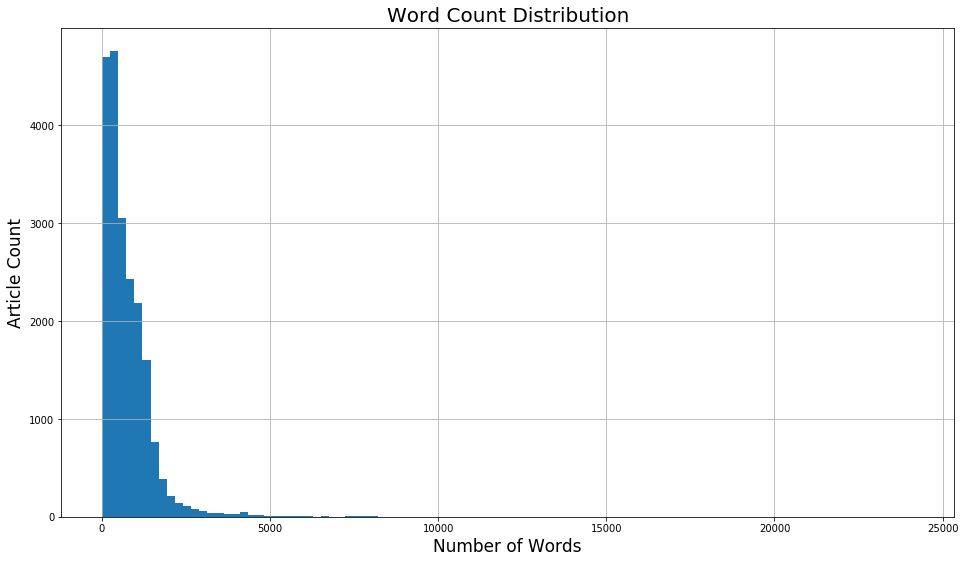

In [33]:
# plot word count distribution
plt.figure(figsize=(16,9))
df['word_count'].hist(bins = 100)
plt.title('Word Count Distribution', fontsize=20)
plt.xlabel('Number of Words', fontsize=17)
plt.ylabel('Article Count', fontsize=17);

A single color of this graph makes it difficult to distinguish the correlation between the real and fake articles. I will assign labels to further investigate the relationship.

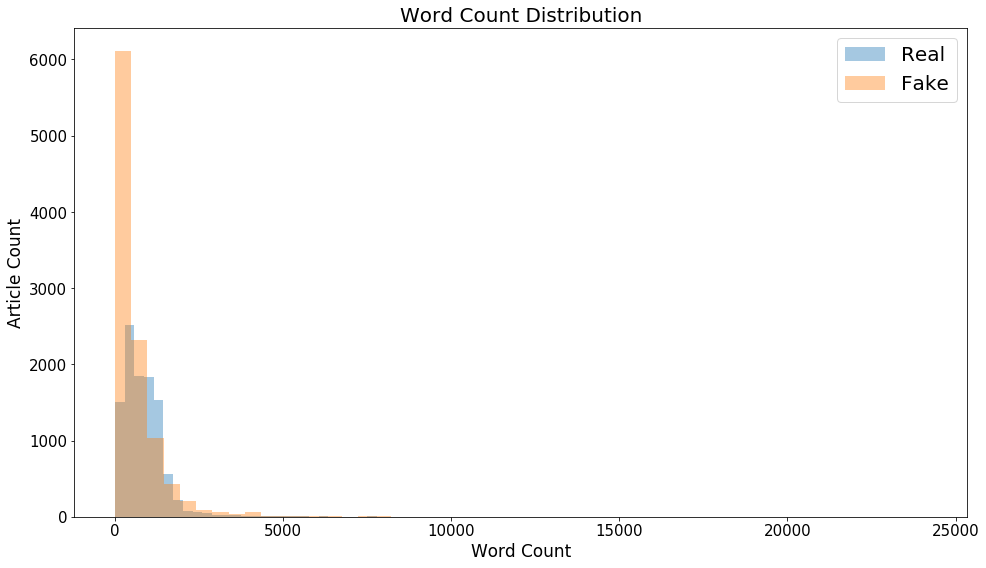

In [154]:
# plot word count distribution with color labels
plt.figure(figsize=(16,9))
sns.distplot(df[df['label'] == 0]['word_count'], kde=False, label='Real')
sns.distplot(df[df['label'] == 1]['word_count'], kde=False, label='Fake')
plt.xlabel('Word Count', fontsize='17')
plt.xticks(fontsize='15')
plt.ylabel('Article Count', fontsize='17')
plt.yticks(fontsize='15')
plt.legend(fontsize='20')
plt.title('Word Count Distribution', fontsize=20);

This graph shows the word count with the real and fake labels colored. There seems to be an overwhelming amount of fake articles with lower article word count.

In [178]:
# most common words not including stop words
cv = CountVectorizer()
cv.fit(df['text'])

status_cv = cv.transform(df['text'])
status_df = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

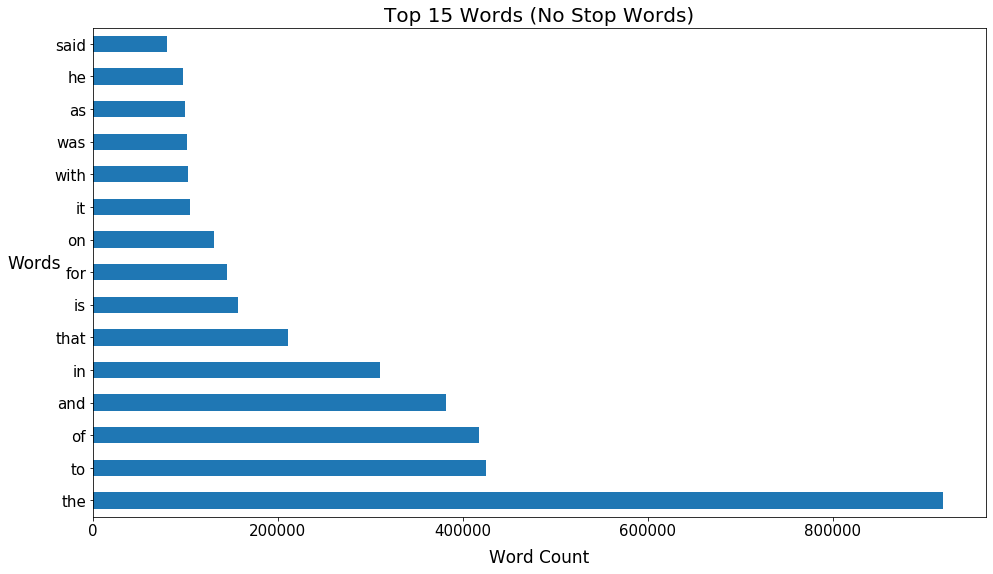

In [179]:
# show the most common words without stop words
plt.figure(figsize=(16,9))
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Words (No Stop Words)', fontsize='20')
plt.xlabel('Word Count', fontsize='17', labelpad=10)
plt.xticks(fontsize='15')
plt.ylabel('Words', fontsize='17', rotation=0, labelpad=20)
plt.yticks(fontsize='15');

Stop words are important in removing the words that are repetitive but carry very little significance or meaning. The difference will be more evident when the stop word list is applied.

In [37]:
# most common words including stop words
cv = CountVectorizer(stop_words='english', min_df=3)
cv.fit(df['text'])

status_cv = cv.transform(df['text'])
status_df = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

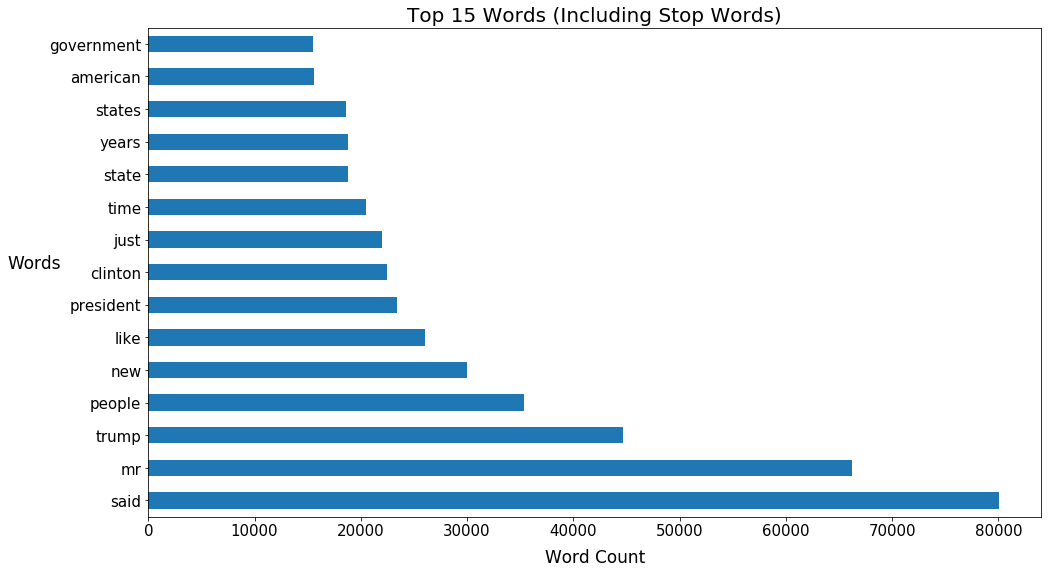

In [169]:
# show the most common words with stop words
plt.figure(figsize=(16,9))
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.title('Top 15 Words (Including Stop Words)', fontsize='20')
plt.xlabel('Word Count', fontsize='17', labelpad=10)
plt.xticks(fontsize='15')
plt.ylabel('Words', fontsize='17', rotation=0, labelpad=15)
plt.yticks(fontsize='15');

When the stop words list is applied, it is easier to understand the most common and important words in the articles. These will be important in classifying between the real and fake articles.

## Model Prep

In [39]:
# create X and y varaible
X = df['text']
y = df['label']

A X and y variable is created to distinguish between the variable that will be evaluated and the target variable.

In [40]:
# split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)


The training set is the subset of the data that the model will be fit on. The testing set, a subset of 33% of the data in this particular example, will be the data that evaluates the quality of the predictions. A random state is specified to ensure the same output when no changes are made to parameters. The stratify parameter will preserve the same proportion of classes in the train and test sets. This will allow for better predictions and reproduceability of results.

## Modeling

### CVEC and Multinomial Naive Bayes

CountVectorizer is a transformer that converts the text data into a structured numeric dataframe that can be used in the model. Multinomial Naive Bayes is one of the three common types of Naive Bayes models. This one in particular is used when the variables are positive integers.

In [41]:
# create a pipeline with a transformer and estimator
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

A pipeline is created to grid search over various hyperparameters to produce the best score. Without Naive Bayes or another model acting as an estimator, it would not be possible to compare the performance.

In [42]:
# search over various hyperparameters
pipe_params = {
    'cvec__max_features': [1500],
    'cvec__min_df': [2],
    'cvec__max_df': [.50],
    'cvec__ngram_range': [(1,1), (1, 2)]
}

Inputting a list of possible values for hyperparameters, an option that affects the model but cannot be learned by the data, allows control over the large number of created columns from CountVectorizer. 
- Max features filters out the least popular and saves the words most commonly used.
- Min and max df sets the minimum number of documents the words must be located in to be considered and a percentage, respectively.
- N-grams can capture words in groups which will help highlight common phrases.

In [43]:
# instantiate gridsearch
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5) 

In [44]:
# fit gridsearch to training data
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [46]:
# score model on training set
gs.score(X_train, y_train)

0.8729908151549942

The score on the training set determines if the model is doing well on the data it was trained on. A score represents 87% accuracy in classifying news articles.

In [47]:
# score model on testing set
gs.score(X_test, y_test)

0.870920745920746

The score of the testing set determines in the model is doing well on new data. If the scores vary greatly between the training and test score, there may be high bias or variance. 

In [101]:
# get cross val score
cross_val_score(gs.best_estimator_, X, y, cv = 5).mean()

0.8718269230769231

The cross validation score takes the idea of a single train and test split and expands it to multiple test across different train/test splits. The cross validation score should agree with the test score.

### TFID and Logistic Regression

Term Frequency-Inverse Document Frequency is a transformer that takes into account the frequency in the document and corpus. In other words, it highlights which words are important to one document, relative to all the documents.

In [50]:
# create a pipeline with transformer and estimator
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('log_m', LogisticRegression(solver = "liblinear"))
])

In [51]:
# construct grid parameters 
pipe_tvec_params = {
    "tvec__ngram_range" : [(1,2)],
    "tvec__stop_words" : ["english"],
    'log_m__penalty' : ["l2"],
    'log_m__C' : [4]
}

In [52]:
 # perform grid search
gs_tvec = GridSearchCV(pipe_tvec, # pipeline object replaces what we usually had as empty model class
                 pipe_tvec_params,
                 cv = 5)

In [53]:
# fit gridseach on training data
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [54]:
# get training score
gs_tvec.score(X_train, y_train)

0.9987083811710677

This shows a 99% accuracy on the score for the training set. The model does well with understanding the data it was trained on.

In [55]:
# get test score
gs_tvec.score(X_test, y_test)

0.9568764568764568

This 95% accuracy represents the scoring on the test data. This is the top accuracy out of all the models. Though slightly lower than the training set score, this is good news that our model can accurately classify new data.

In [56]:
# get cross val score
cross_val_score(gs_tvec.best_estimator_, X, y, cv = 5).mean()

0.9561538461538464

This shows us that the model has an 95% accuracy based on the best set of parameters and that the test score can be trusted.

## Model Selection

Model Name | Training Score | Testing Score 
- | - | - 
Baseline Model | 50 | 50 
CVEC & Multinomial Naive Bayes | 87 | 87
TFID & Logistic Regression | 99 | 95 

Based on this chart, I select the TFID and Logistic Regression model because it has clear increase in its ability to accurately classify real and fake data in both training and test data.

## Model Evaluation - TFID and Logistic Regression

### Confusion Matrix

In [75]:
# generate predictions.
preds = gs_tvec.predict(X_test)

In [76]:
# generate confusion matrix
confusion_matrix(y_test, preds)

array([[3321,  107],
       [ 189, 3247]])

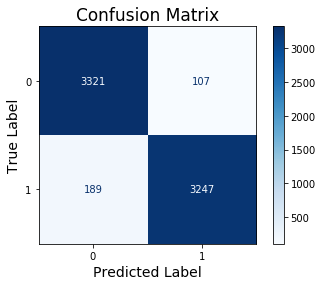

In [165]:
# plot confusion matrix
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize='17');
plt.xlabel('Predicted Label', fontsize='14')
plt.xticks(fontsize='10')
plt.ylabel('True Label', fontsize='14')
plt.yticks(fontsize='10');

To understand how well this model will do on new data, I generated a confusion matrix on the testing set. The confusion matrix contains four areas of seperation

1. True Positive - article predicted as real and is real (items correctly predicted to be positive)

2. False Positive - article predicted as real but is fake (items incorrectly predicted to be positive)

3. False Negative - article predicted to be fake and is real (items incorrectly predicted to be negative)

4. True Negative - article predicted to be fake and is fake (items correctly predicted to be negative)

In [65]:
# create a dataframe of true values and predicted probabilities
pred_proba = [i[1] for i in gs_tvec.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [66]:
# view the first five items of dataframe
pred_df.head()

,true_values,pred_probs
13324,0,0.689895
12826,1,0.851831
15593,0,0.047018
9635,0,0.001296
9926,1,0.831754


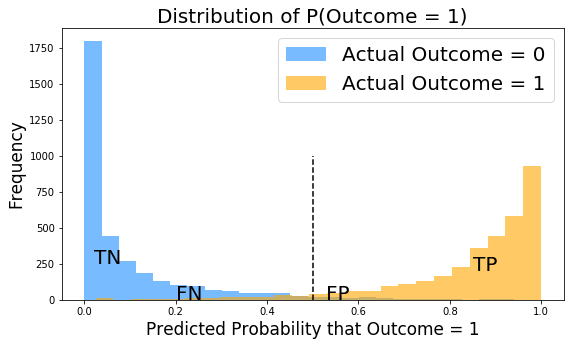

In [99]:
# plot the distributions of predicted probability
plt.figure(figsize = (9,5))

# create two histograms
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'dodgerblue',
         alpha = 0.6,
         label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Actual Outcome = 1')
# set vertical line 
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 1000,
           color = 'black',
           linestyle = '--')
# add annotations from classification matrix
plt.annotate(xy = (0.02, 250),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.2, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 200),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)

plt.title('Distribution of P(Outcome = 1)', fontsize = 20)
plt.ylabel('Frequency', fontsize = 17)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 17)
plt.legend(fontsize = 20);

This graph is a representation of the predicted probabilities from the TFID and Logistic Regression model. The goal is to create a model with no overlap between the colors. The classification are labeled and there is some cases of false positive and false negatives.

### Receiver Operating Characteristic (ROC) Curve

The overlap between the previous distribution is known as the area under the ROC curve. The ROC curve is generated by plotting the numbers of sensitivity and specificity, ranging from 0 to 1, and incrementally increasing the threshold.

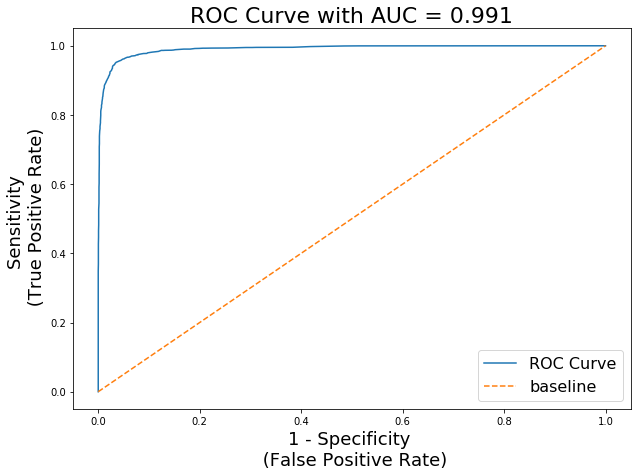

In [106]:
# create a plot for the ROC curve
plt.figure(figsize = (10,7))

# create threshold values
thresholds = np.linspace(0, 1, 200)

# create function to calculate sensitivity
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# create function to calculate 1 - specificity
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# plot roc curve.
plt.plot(fpr_values, tpr_values, label='ROC Curve')

# plot baseline
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity \n (True Positive Rate)', fontsize=18)
plt.xlabel('1 - Specificity \n (False Positive Rate)', fontsize=18)
plt.legend(fontsize=16);

The roc auc score has a maximum score of 1 and the model scored 0.991. This represents a model that can separate the real and fake articles very well. 

## Conclusion and Recommendations

The model I have chosen, TFID and Logistic Regression, will accurately classify whether an article is real or fake based on the text. After cleaning and visualizing the data, along with  creating multiple models, I have come to this conclusion. In comparison with the other models, this outperforms them all and will give you the best accuracy to properly classify the article. This model should be applied before sharing any content with friends or on social media. 

It is important to fact check whenever you read an article or post. You should also choose to consume information from trusted sources that have multiple filters or must abide by a certain ethic code. It is just as important to be aware that certain main media sources have a news bias. They may be presenting the same information but from a different sentiment and perspective. Also consider not reading the headlines and passing information if you have not read the text. This is considered false connection and is intended to mislead consumers.

### Misclassification

In [135]:
pred_df.loc[9976]

true_values    0.000000
pred_probs     0.591708
Name: 9976, dtype: float64

In [122]:
pred_df.loc[14981]

true_values    1.000000
pred_probs     0.397999
Name: 14981, dtype: float64

In [114]:
df.loc[df['id'] == 9976]

,id,title,author,text,label,author_count,polarity,text_length,word_count,label_class
9976,9976,Barack Obama and Angela Merkel Plan Globalist ...,Charlie Spiering,former president barack obama plans to speak a...,0,141.0,0.099924,1082,181,True


In [123]:
df.loc[df['id'] == 14981]

,id,title,author,text,label,author_count,polarity,text_length,word_count,label_class
14981,14981,Kerry: We Have To Worry About Treatment of Tra...,EdJenner,on sunday secretary of state john kerry marked...,1,69.0,0.1,213,33,False


In [138]:
print_plot(9976)

former president barack obama plans to speak at a forum in berlin with chancellor angela merkel to share their ideas about global responsibility in an increasingly   planet the topic of discussion will be being involved in democracy taking on responsibility locally and globally at a forum sponsored by the german protestant kirchentag and the obama foundation to celebrate the 500th anniversary of the protestant reformation  the churches form a global civil society network of over two billion christians together as people of faith we live from the firm hope for a better world said heinrich   a theology professor who is helping coordinate the conference the event will take place at the brandenburg gate not far from obamas first major international speech in europe as he campaigned for president in 2008 during that speech obama noted that the burdens of global citizenship continue to bind us together  i speak to you not as a candidate for president but as a citizen     a proud citizen of t

This article was incorrectly classified as real when it is actually fake, false positive. This could be attributed to important words the TF-IDF selected in the text document. This could be improved by adding new stop words or removing some that may be impactful in classifying the articles.

In [139]:
print_plot(14981)

on sunday secretary of state john kerry marked transgender day of remembrance with a released statement on the state department website imploring the united states to focus on the treatment of transgender people  
label: 1


This article was misclassified as fake when it is real, false negative. This is attributed to the length of text and word count. In the previous visualizations, it was easy to see there were significantly more fake articles with fewer words.

## References

1. [Data](https://www.kaggle.com/c/fake-news/data)
2. [Fake News](https://en.wikipedia.org/wiki/Fake_news)
3. [Global Lesson Classification Metric II](https://git.generalassemb.ly/DSI-US-12/4.05-lesson-classification-metrics-ii)
4. [Fake News & AI](https://miguelmalvarez.com/2017/03/23/how-can-machine-learning-and-ai-help-solving-the-fake-news-problem/)